In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Population_Survey_Data_lyst1750274390196.csv')
data.head()

,ID,Age,Gender,Income,Education,Region
0,1,62,Other,96138,Masters,East
1,2,65,Other,76543,PhD,East
2,3,71,Male,138887,Bachelors,East
3,4,18,Other,121643,Bachelors,South
4,5,21,Male,143192,Masters,East


In [3]:
data.shape

(1000, 6)

1. Simple Random Sampling - Select 100 records from 1000 randomly

In [4]:
data_sample = data.sample(n=100,random_state=0)
data_sample

,ID,Age,Gender,Income,Education,Region
993,994,45,Other,94232,PhD,North
859,860,23,Male,112392,Bachelors,West
298,299,37,Female,22845,Bachelors,East
553,554,47,Other,60439,PhD,East
672,673,28,Female,139844,Bachelors,North
...,...,...,...,...,...,...
485,486,76,Male,44081,Masters,West
568,569,74,Other,48391,Masters,West
108,109,54,Male,44726,Masters,West
367,368,35,Other,36723,Bachelors,North


2. Stratified Sampling - From each region, select 25 samples. If a region has fewer than 25 records, then select all available records from that region.


In [5]:
stratified_sample = data.groupby('Region').apply(lambda x : x.sample(min(len(x),25),random_state=0))
stratified_sample.to_csv('stratified_sample.csv')
stratified_sample

/tmp/ipython-input-3686372207.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('Region').apply(lambda x : x.sample(min(len(x),25),random_state=0))


ID  Age  Gender  Income    Education Region
Region                                                  
East   596  597   53    Male  127677      Masters   East
       319  320   21   Other   46704    Bachelors   East
       645  646   45    Male   56884    Bachelors   East
       392  393   61    Male  142023      Masters   East
       567  568   37  Female   94907      Masters   East
...         ...  ...     ...     ...          ...    ...
West   831  832   73    Male  140899      Masters   West
       551  552   41  Female   76545          PhD   West
       649  650   38  Female   85588  High School   West
       320  321   49  Female   68611    Bachelors   West
       127  128   49    Male  105654      Masters   West

[100 rows x 6 columns]

# 3. Cluster Sampling – Manufacturing data grouped by batch number

This means each batch number = one cluster, and then you select entire clusters (batches) instead of individual items.

In [6]:
manufacturing_data = pd.read_csv('/content/Manufacturing_Data_lyst1750274395200.csv')
manufacturing_data

,ProductID,BatchNumber,ProductionDate,Defective,Weight,Length
0,1,25,2024-01-09,0,462.453744,17.613212
1,2,45,2024-04-18,0,521.766704,15.899234
2,3,20,2024-04-11,0,498.369030,14.177899
3,4,31,2024-06-27,0,488.938762,16.498599
4,5,14,2023-10-27,0,524.459295,15.422276
...,...,...,...,...,...,...
995,996,44,2023-08-14,0,471.355934,11.495162
996,997,13,2023-11-28,0,526.808606,15.562046
997,998,48,2024-04-15,0,506.841497,16.249218
998,999,9,2023-08-28,1,521.412567,14.854907


In [7]:
clusters = manufacturing_data['BatchNumber'].unique()
clusters

array([25, 45, 20, 31, 14,  8, 36, 30, 21,  9, 11, 42, 35, 47, 12, 22,  5,
       48, 23,  7, 44, 33, 38,  4, 18,  6, 28,  2, 34, 41, 40, 19, 16, 46,
       49, 43, 17,  3, 13, 10, 29, 32, 24, 26, 39, 15,  1, 27, 37])

In [8]:
clusters = np.random.choice(clusters, size = 5, replace= False)
clusters

array([40, 26, 43, 23, 17])

In [9]:
clustered_sample = manufacturing_data[manufacturing_data['BatchNumber'].isin(clusters)]
clustered_sample

,ProductID,BatchNumber,ProductionDate,Defective,Weight,Length
22,23,23,2024-03-28,0,499.631419,12.242326
29,30,23,2024-04-07,0,533.366221,14.709696
46,47,40,2023-12-13,0,522.484435,16.400715
57,58,43,2023-12-17,0,503.973459,16.924445
59,60,17,2023-12-03,0,476.884150,14.528392
...,...,...,...,...,...,...
957,958,17,2023-11-20,0,476.427667,12.536897
972,973,40,2024-07-02,0,531.065653,14.211555
978,979,43,2024-06-20,0,514.585775,13.469548
980,981,40,2024-03-18,0,493.152639,16.151341


# 4. Systematic Sample - Select Every 10th record

In [10]:
systematic_sample = data.iloc[::10,:]
systematic_sample

,ID,Age,Gender,Income,Education,Region
0,1,62,Other,96138,Masters,East
10,11,39,Male,25241,Masters,West
20,21,56,Other,121272,PhD,South
30,31,27,Female,58115,High School,East
40,41,53,Female,147482,Bachelors,North
...,...,...,...,...,...,...
950,951,78,Male,121159,PhD,North
960,961,55,Female,34823,Bachelors,South
970,971,36,Other,108570,Bachelors,South
980,981,77,Female,123554,Bachelors,North


# Measures of central Tendency

In [11]:
data.head()

,ID,Age,Gender,Income,Education,Region
0,1,62,Other,96138,Masters,East
1,2,65,Other,76543,PhD,East
2,3,71,Male,138887,Bachelors,East
3,4,18,Other,121643,Bachelors,South
4,5,21,Male,143192,Masters,East


In [12]:
mean_income = data['Income'].mean()
mean_income

np.float64(85147.959)

In [13]:
sort_income = data.sort_values('Income')
income_median = sort_income['Income'].median()
income_median

85589.5

In [14]:
mode_Income = data['Income'].mode()
mode_Income

,Income
0,52869
1,59332
2,78883
3,103180


Ques -Evaluate the measure of central tendency for the whole data followed by the simple random sample, stratified random sample and systematic sample.
Compare the means of all the different types of sample.

In [15]:
## Explore the measures of dispersion at your end: Range, IQR, Standard Deviation, Variance
mean_entire_data = data['Income'].mean()
print(mean_entire_data)
print(data_sample['Income'].mean())
print(stratified_sample['Income'].mean())
# print(clustered_sample['Income'].mean())
print(systematic_sample['Income'].mean())

85147.959
82657.34
87290.58
88961.4


In [16]:
median_entire_data = data.sort_values('Income')
income_median = sort_income['Income'].median()
print(income_median)
print(data_sample['Income'].median())
print(stratified_sample['Income'].median())
# print(clustered_sample['Income'].mean())
print(systematic_sample['Income'].median())

85589.5
87057.0
88110.5
94080.0


In [17]:
income_median = sort_income['Income'].mode()
print(income_median)
print(data_sample['Income'].mode())
print(stratified_sample['Income'].mode())
print(systematic_sample['Income'].mode())

0     52869
1     59332
2     78883
3    103180
Name: Income, dtype: int64
0      20359
1      22845
2      22945
3      23901
4      24829
       ...  
95    141247
96    143189
97    144688
98    145736
99    148906
Name: Income, Length: 100, dtype: int64
0      20851
1      20884
2      20966
3      22556
4      23621
       ...  
95    144898
96    147230
97    147708
98    148278
99    148821
Name: Income, Length: 100, dtype: int64
0      23962
1      24564
2      25241
3      27696
4      28025
       ...  
95    146887
96    147482
97    148269
98    148821
99    149689
Name: Income, Length: 100, dtype: int64


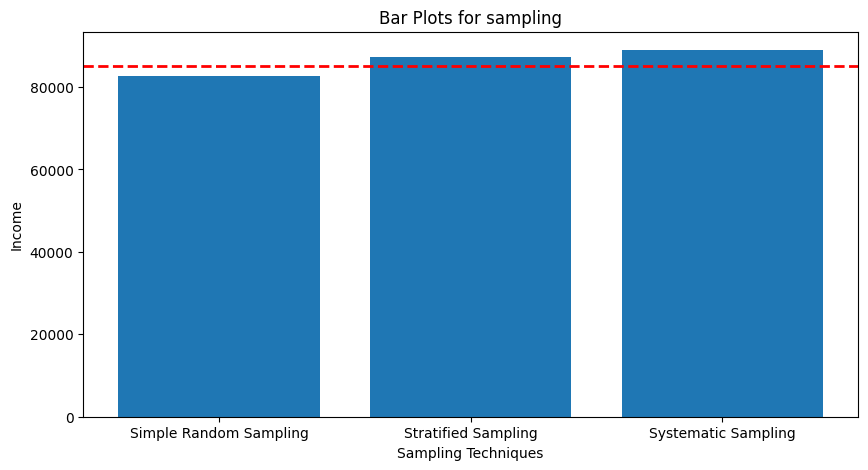

In [18]:
  sampling_data = {
      'Techniques':['Simple Random Sampling','Stratified Sampling','Systematic Sampling'],
      'Mean':[data_sample['Income'].mean(),stratified_sample['Income'].mean(),systematic_sample['Income'].mean()],
  }
  df = pd.DataFrame(sampling_data)
  plt.figure(figsize=(10,5))
  plt.title('Bar Plots for sampling')
  plt.xlabel('Sampling Techniques')
  plt.ylabel('Income')
  plt.bar(df['Techniques'],df['Mean'])
  plt.axhline(y=mean_entire_data, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_entire_data:.2f}')
  plt.show()